In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Tel

/content/drive/MyDrive/Tel


In [ ]:
import time
import os

In [ ]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 데이터셋 불러오기
data = pd.read_csv("tele_customer_Vaule_Up.csv")

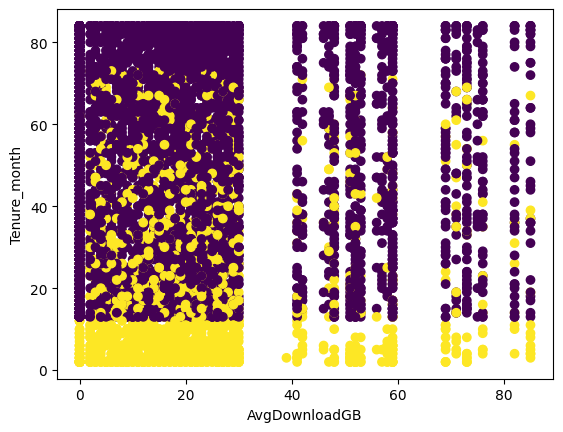

In [ ]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


# ChurnLabel 값이 "Yes"인 데이터 추출
# yes_data = data[data["ChurnLabel"] == "Yes"]
yes_data = data
# KNN 분석 수행을 위한 데이터 전처리
X = yes_data[["AvgDownloadGB", "Tenure_month"]]
y = yes_data["ChurnLabel"]

# 클래스 정보를 숫자 정보로 변환
class_mapping = {"Yes": 1, "No": 0}
y_numeric = y.map(class_mapping)

# KNN 분석 수행
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y_numeric)

# 시각화
fig, ax = plt.subplots()
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_numeric, cmap="viridis")
ax.set_xlabel("AvgDownloadGB")
ax.set_ylabel("Tenure_month")
plt.show()

# Clustering 분석

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


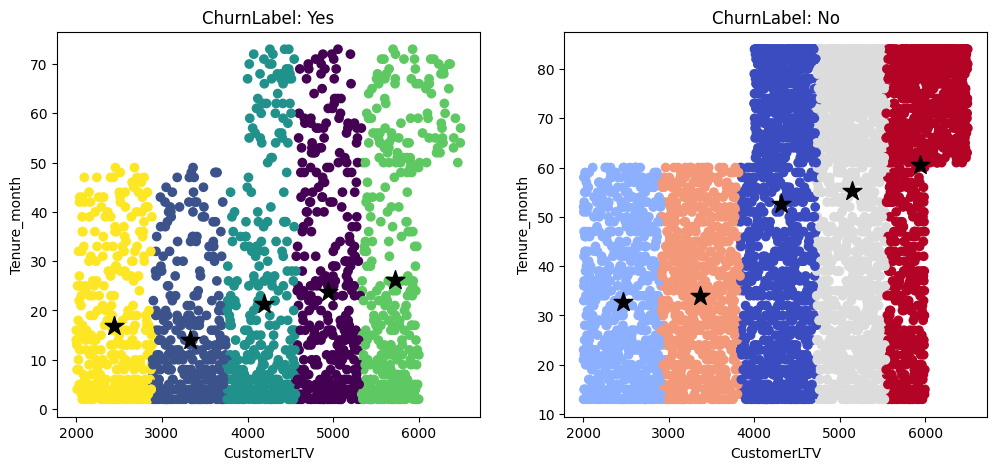

In [ ]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# ChurnLabel 값이 "Yes"인 데이터와 "No"인 데이터 추출
yes_data = data[data["ChurnLabel"] == "Yes"]
no_data = data[data["ChurnLabel"] == "No"]

# Clustering을 위한 데이터 전처리
X_yes = yes_data[["CustomerLTV", "Tenure_month"]]
X_no = no_data[["CustomerLTV", "Tenure_month"]]

# Clustering 수행
kmeans_yes = KMeans(n_clusters=5)
kmeans_yes.fit(X_yes)
kmeans_no = KMeans(n_clusters=5)
kmeans_no.fit(X_no)

# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_yes.iloc[:, 0], X_yes.iloc[:, 1], c=kmeans_yes.labels_, cmap="viridis")
ax2.scatter(X_no.iloc[:, 0], X_no.iloc[:, 1], c=kmeans_no.labels_, cmap="coolwarm")
ax1.scatter(kmeans_yes.cluster_centers_[:, 0], kmeans_yes.cluster_centers_[:, 1], marker="*", s=200, c="black")
ax2.scatter(kmeans_no.cluster_centers_[:, 0], kmeans_no.cluster_centers_[:, 1], marker="*", s=200, c="black")
ax1.set_xlabel("CustomerLTV")
ax1.set_ylabel("Tenure_month")
ax2.set_xlabel("CustomerLTV")
ax2.set_ylabel("Tenure_month")
ax1.set_title("ChurnLabel: Yes")
ax2.set_title("ChurnLabel: No")
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


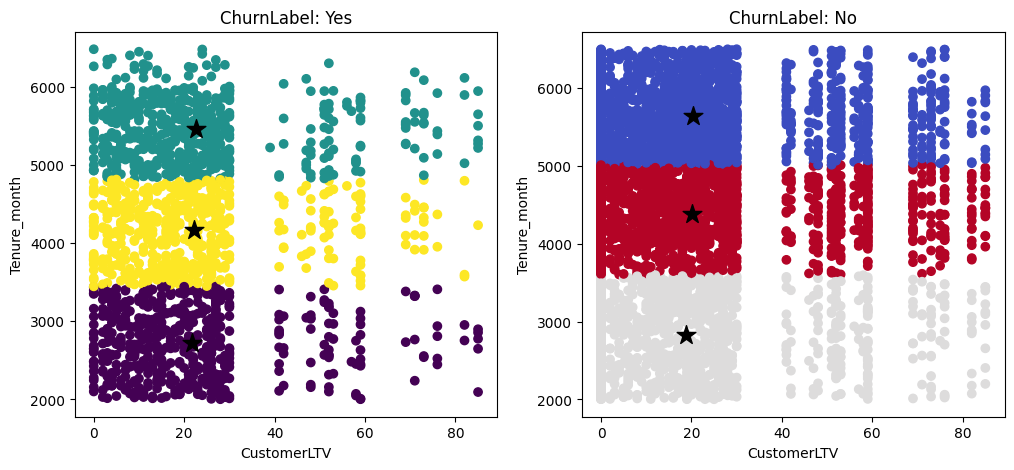

In [ ]:
# 필요한 패키지 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# ChurnLabel 값이 "Yes"인 데이터와 "No"인 데이터 추출
yes_data = data[data["ChurnLabel"] == "Yes"]
no_data = data[data["ChurnLabel"] == "No"]

# Clustering을 위한 데이터 전처리
X_yes = yes_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
X_no = no_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]

# Clustering 수행
kmeans_yes = KMeans(n_clusters=3)
kmeans_yes.fit(X_yes)
kmeans_no = KMeans(n_clusters=3)
kmeans_no.fit(X_no)

# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_yes.iloc[:, 0], X_yes.iloc[:, 1], c=kmeans_yes.labels_, cmap="viridis")
ax2.scatter(X_no.iloc[:, 0], X_no.iloc[:, 1], c=kmeans_no.labels_, cmap="coolwarm")
ax1.scatter(kmeans_yes.cluster_centers_[:, 0], kmeans_yes.cluster_centers_[:, 1], marker="*", s=200, c="black")
ax2.scatter(kmeans_no.cluster_centers_[:, 0], kmeans_no.cluster_centers_[:, 1], marker="*", s=200, c="black")
ax1.set_xlabel("CustomerLTV")
ax1.set_ylabel("Tenure_month")
ax2.set_xlabel("CustomerLTV")
ax2.set_ylabel("Tenure_month")
ax1.set_title("ChurnLabel: Yes")
ax2.set_title("ChurnLabel: No")
plt.show()

# 이탈확률 예측

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# ChurnLabel이 "Yes" 또는 "No"인 데이터 추출
yes_data = data[data["ChurnLabel"] == "Yes"]
no_data = data[data["ChurnLabel"] == "No"]

# KNN 분석 수행을 위한 데이터 전처리
X_yes = yes_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
X_no = no_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
y_yes = yes_data["ChurnLabel"]

# 클래스 정보를 숫자 정보로 변환
class_mapping = {"Yes": 1, "No": 0}
y_yes_numeric = y_yes.map(class_mapping)

# KNN 분석 수행
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_yes, y_yes_numeric)



KNeighborsClassifier()

In [ ]:
import warnings
# 경고 메시지 무시
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# No인 고객을 대상으로 Churn 예측 확률 출력
prob_no = []

for sample in X_no.values:
    try:
        prob_yes = knn.predict_proba([sample])[0, 1]
    except IndexError:
        prob_yes = 0
    prob_no.append(prob_yes)


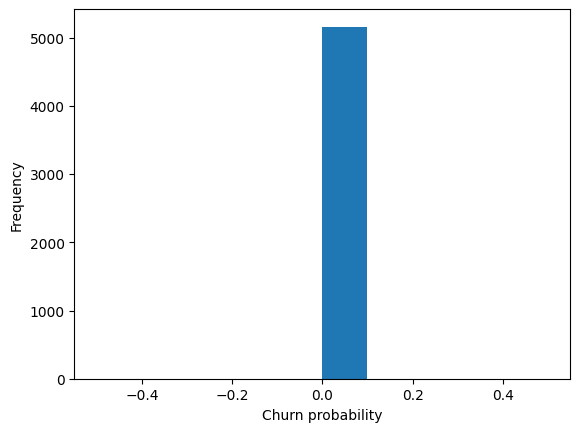

In [ ]:
# prob_no 분포 시각화
plt.hist(prob_no)
plt.xlabel("Churn probability")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

def sigmoid(similarity):
    return 1 / (1 + np.exp(-similarity))

data = pd.read_csv("tele_customer_final.csv")

# ChurnLabel이 "Yes" 또는 "No"인 데이터 추출
yes_data = data[data["ChurnLabel"] == "Yes"]
no_data = data[data["ChurnLabel"] == "No"]

# KNN 분석 수행을 위한 데이터 전처리
X_yes = yes_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
X_no = no_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
y_yes = yes_data["ChurnLabel"]

# KNN 분석 모델 학습
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_model.fit(X_yes, y_yes)

# No 클래스 데이터 추출 및 거리 계산
y_no = no_data["ChurnLabel"]

# Yes 클래스 데이터와 No 클래스 데이터간의 거리 계산
distances = pairwise_distances(X_no, X_yes, metric='euclidean')
similarity = np.mean(1 / (distances + 1), axis=1)
similarity_sigmoid = sigmoid(similarity)

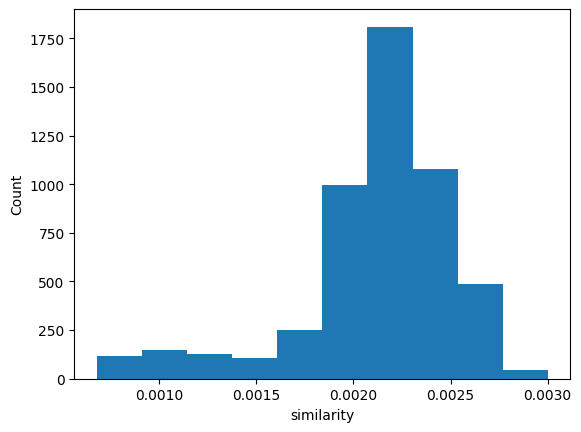

In [ ]:
# similarity 분포 시각화
plt.hist(similarity)
plt.xlabel("similarity")
plt.ylabel("Count")
plt.show()

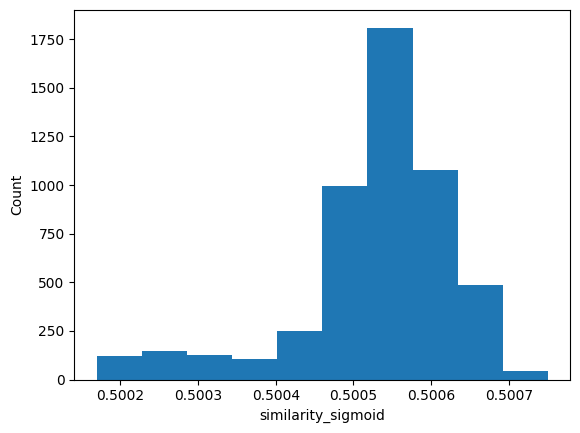

In [ ]:
# similarity_sigmoid 분포 시각화
plt.hist(similarity_sigmoid)
plt.xlabel("similarity_sigmoid")
plt.ylabel("Count")
plt.show()

# DBScan

{0, 1, 2, 3, -1}
{0, 1, 2}
{0, 1, 2}


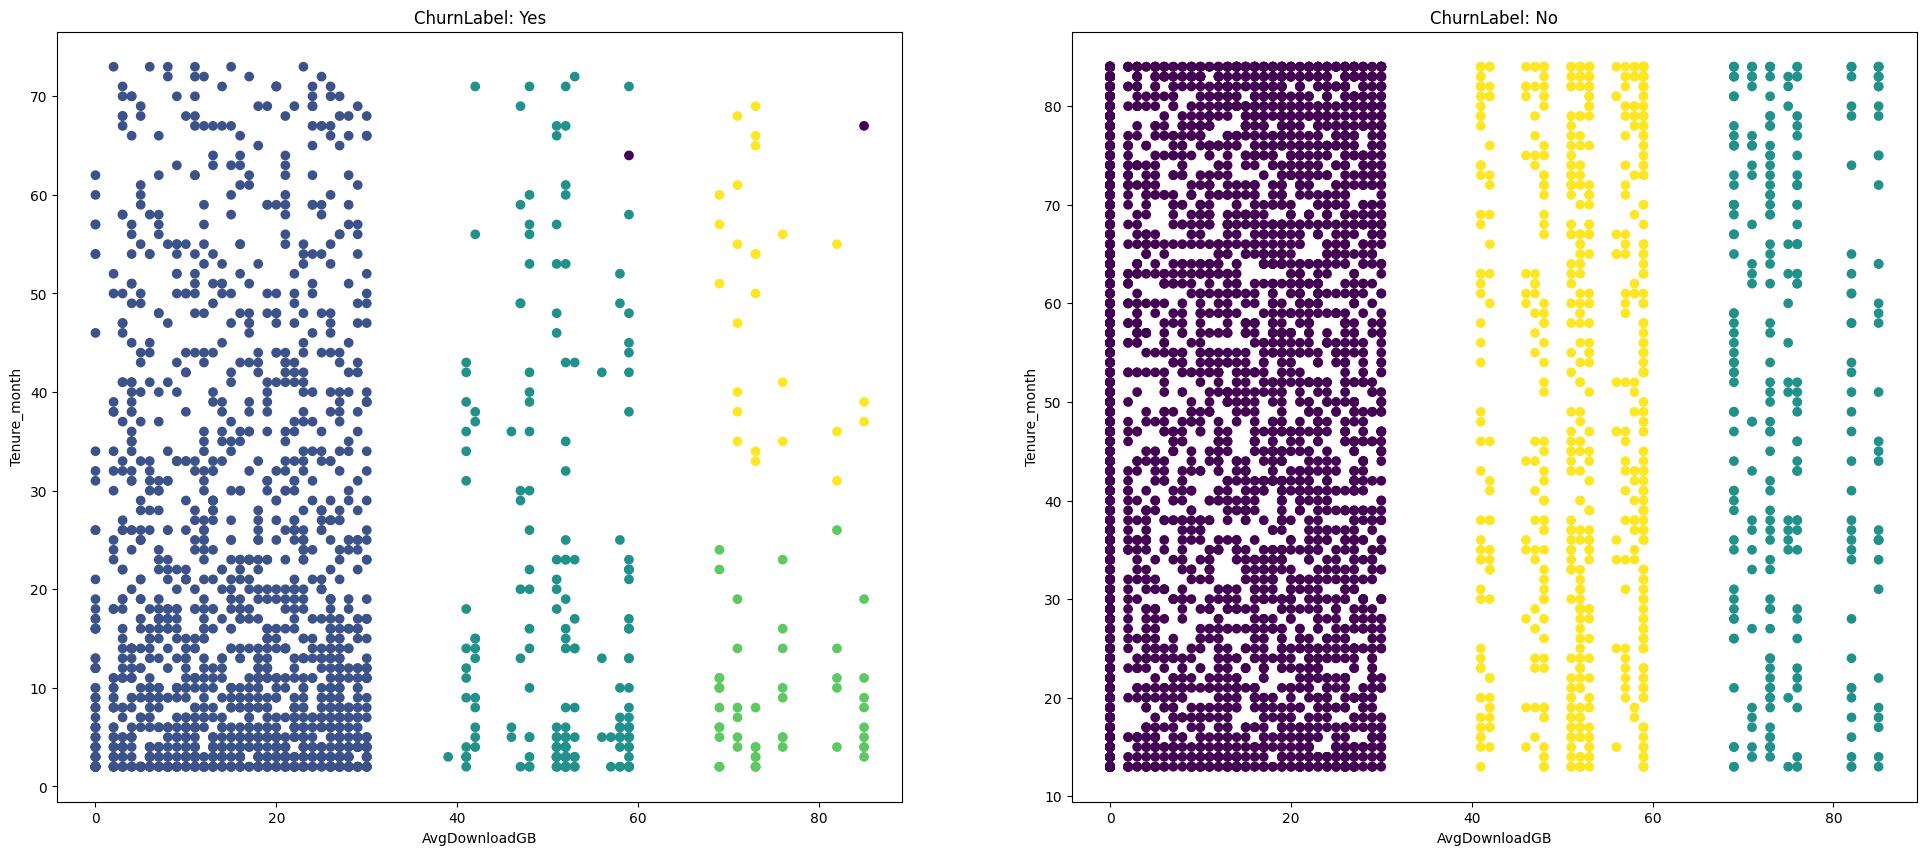

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 데이터셋 불러오기
data = pd.read_csv("tele_customer_final.csv")

# Yes 클래스 데이터만 추출
yes_data = data[data['ChurnLabel'] == 'Yes']
no_data = data[data['ChurnLabel'] == 'No']

# 분석에 사용할 컬럼 선택
# X = yes_data[["AvgDownloadGB", "CustomerLTV", "Tenure_month"]]
X_yes = yes_data[["AvgDownloadGB", 'Tenure_month']]
X_no = no_data[["AvgDownloadGB", 'Tenure_month']]
X_All = data[["AvgDownloadGB", 'Tenure_month']]

# 데이터 스케일링
scaler = StandardScaler()
X_yes_scaled = scaler.fit_transform(X_yes)
X_no_scaled = scaler.fit_transform(X_no)
X_All_scaled = scaler.fit_transform(X_All)

# DBSCAN 모델 생성
dbscan_yes = DBSCAN(eps=0.4, min_samples=5)
dbscan_no = DBSCAN(eps=0.4, min_samples=5)
dbscan_all = DBSCAN(eps=0.4, min_samples=5)

# 모델 학습
dbscan_yes.fit(X_yes_scaled)
dbscan_no.fit(X_no_scaled)
dbscan_all.fit(X_All_scaled)

# 클러스터 번호 출력
print(set(dbscan_yes.labels_))
print(set(dbscan_no.labels_))
print(set(dbscan_all.labels_))


# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 10))
ax1.scatter(X_yes.iloc[:, 0], X_yes.iloc[:, 1], c=dbscan_yes.labels_, cmap="viridis")
ax2.scatter(X_no.iloc[:, 0], X_no.iloc[:, 1], c=dbscan_no.labels_, cmap="viridis")
ax1.set_xlabel("AvgDownloadGB")
ax1.set_ylabel("Tenure_month")
ax2.set_xlabel("AvgDownloadGB")
ax2.set_ylabel("Tenure_month")
ax1.set_title("ChurnLabel: Yes")
ax2.set_title("ChurnLabel: No")
plt.show()

<ipython-input-204-80221cf477e2>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=colors, cmap="viridis")


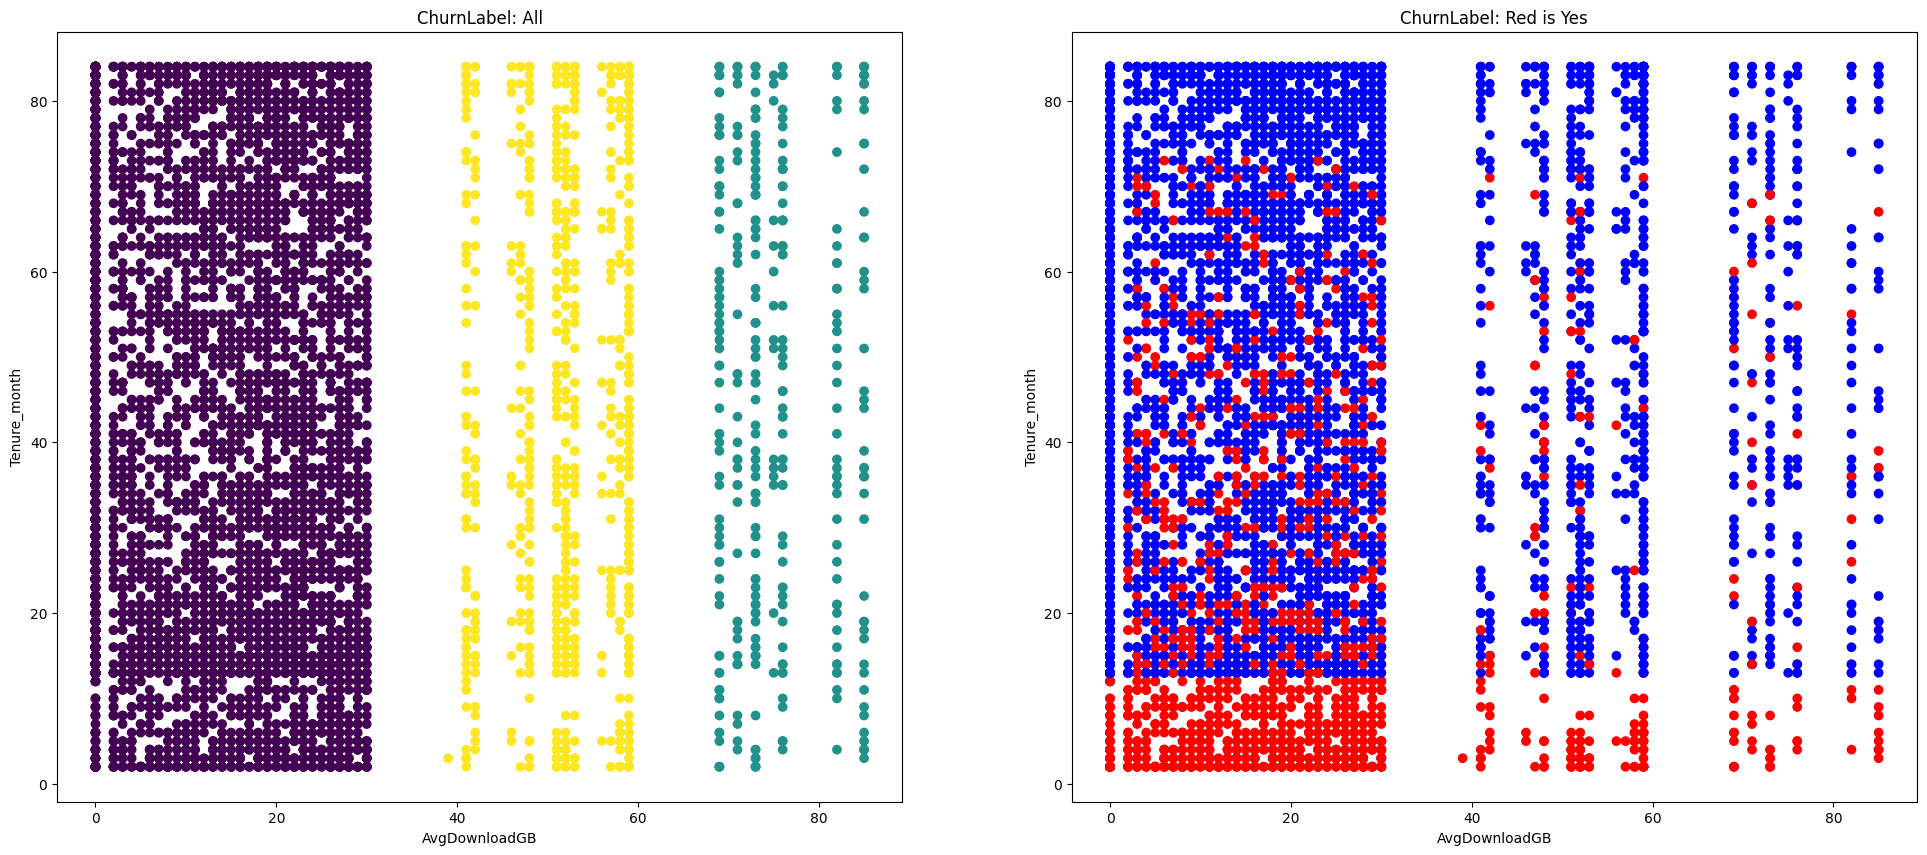

In [ ]:
# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 10))
markers = data['ChurnLabel'].apply(lambda x: 'o' if x == 'Yes' else 'x')
colors = data['ChurnLabel'].apply(lambda x: 'red' if x == 'Yes' else 'blue')
ax1.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=dbscan_all.labels_, cmap="viridis")
ax2.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=colors, cmap="viridis")
ax1.set_xlabel("AvgDownloadGB")
ax1.set_ylabel("Tenure_month")
ax2.set_xlabel("AvgDownloadGB")
ax2.set_ylabel("Tenure_month")
ax1.set_title("ChurnLabel: All")
ax2.set_title("ChurnLabel: Red is Yes")
plt.show()

<ipython-input-194-54c6e8f7eda0>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=colors, cmap="viridis")


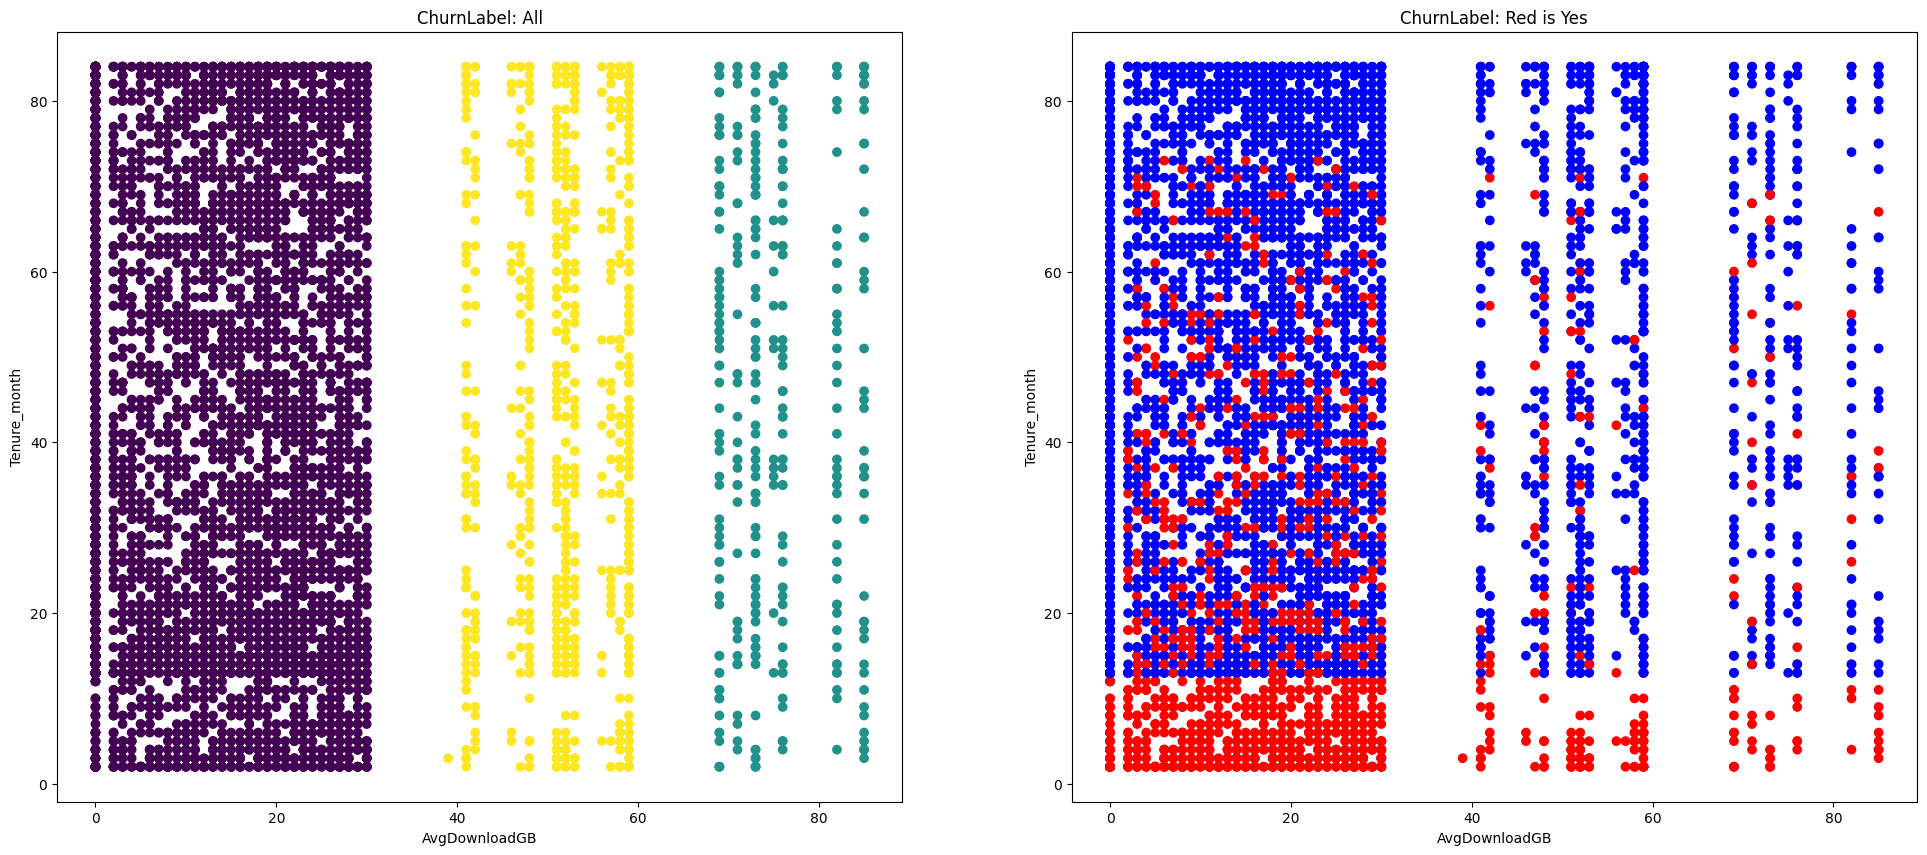

In [ ]:
import matplotlib.pyplot as plt

# 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 10))

# DBSCAN으로 클러스터링 한 결과 시각화
ax1.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=dbscan_all.labels_, cmap="viridis")
ax1.set_xlabel("AvgDownloadGB")
ax1.set_ylabel("Tenure_month")
ax1.set_title("ChurnLabel: All")

# ChurnLabel이 Yes인 데이터 색상으로 구분해서 시각화
colors = data['ChurnLabel'].apply(lambda x: 'red' if x == 'Yes' else 'blue')
ax2.scatter(X_All.iloc[:, 0], X_All.iloc[:, 1], c=colors, cmap="viridis")
ax2.set_xlabel("AvgDownloadGB")
ax2.set_ylabel("Tenure_month")
ax2.set_title("ChurnLabel: Red is Yes")

plt.show()
